# Covid19 Fake News Classification Project

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read Datasets

In [30]:
Fake=pd.read_csv("Fake_Covid_data.csv")

In [31]:
Fake.head()

,tweet_id,tweet_text,retweet_count,reply_count,like_count,Real_Fake
0,1243968198111789058,2. Only older adults and young people are at r...,0,0,0,0
1,1242474839966765056,2. Only older adults and young people are at r...,0,1,0,0
2,1242461115616866304,#Corona Myth &amp; Reality.\n\nMyth: Only olde...,0,0,0,0
3,1238131052582928385,COVID-19 is just like the flu\n\nOnly older ad...,0,0,0,0
4,1254164579459854336,@5151mpk1 @grumpyMichael @ScottMorrisonMP have...,0,0,0,0


In [32]:
Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       5836 non-null   int64 
 1   tweet_text     5836 non-null   object
 2   retweet_count  5836 non-null   int64 
 3   reply_count    5836 non-null   int64 
 4   like_count     5836 non-null   int64 
 5   Real_Fake      5836 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 273.7+ KB


In [33]:
Real1 = pd.read_csv("Real_Covid_data.csv")

In [34]:
Real1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7885 entries, 0 to 7884
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       7885 non-null   int64 
 1   tweet_text     7885 non-null   object
 2   retweet_count  7885 non-null   int64 
 3   reply_count    7885 non-null   int64 
 4   like_count     7885 non-null   int64 
 5   Real_Fake      7885 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 369.7+ KB


In [35]:
Real1.head()

,tweet_id,tweet_text,retweet_count,reply_count,like_count,Real_Fake
0,1253283636843089920,How large does a meeting or event need to be i...,0,1,0,1
1,1253965710520397828,@Cordobesa2201 @Rumpelstinski6 @sanidadgob Doe...,0,0,0,1
2,1253959004436467713,@Cordobesa2201 @Rumpelstinski6 @sanidadgob Doe...,0,0,0,1
3,1252584911183249409,@AngryDuck91 MASS GATHERING\n- Does WHO recomm...,0,0,0,1
4,1252577361545043968,@AngryDuck91 - Does WHO recommend that all int...,0,0,0,1


In [36]:
Real2 = pd.read_csv("Real_Covid_data_1.csv")

In [37]:
Real2.head()

,tweet_id,tweet_text,retweet_count,reply_count,like_count,Real_Fake
0,1278419860196921347,Q: Can people wear masks while exercising? \nA...,0,0,1,1
1,1278419547146596352,Q: Can people wear masks while exercising? \nA...,0,0,1,1
2,1278264430980022277,People should Not wear #Masks while exercising...,0,0,0,1
3,1278262917360693248,Q: Can people wear masks while exercising? \nA...,1049,128,1840,1
4,1278099968830648325,Can people wear masks while exercising? \n\nPe...,0,0,2,1


In [38]:
Real2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       8049 non-null   int64 
 1   tweet_text     8049 non-null   object
 2   retweet_count  8049 non-null   int64 
 3   reply_count    8049 non-null   int64 
 4   like_count     8049 non-null   int64 
 5   Real_Fake      8049 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.4+ KB


In [39]:
Real = Real1.append(Real2)

In [40]:
Real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15934 entries, 0 to 8048
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       15934 non-null  int64 
 1   tweet_text     15934 non-null  object
 2   retweet_count  15934 non-null  int64 
 3   reply_count    15934 non-null  int64 
 4   like_count     15934 non-null  int64 
 5   Real_Fake      15934 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 871.4+ KB


In [41]:
Data = Real.append(Fake)

In [42]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21770 entries, 0 to 5835
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       21770 non-null  int64 
 1   tweet_text     21770 non-null  object
 2   retweet_count  21770 non-null  int64 
 3   reply_count    21770 non-null  int64 
 4   like_count     21770 non-null  int64 
 5   Real_Fake      21770 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ MB


In [43]:
# Shuffle the data
from sklearn.utils import shuffle
Data = shuffle(Data)
Data = Data.reset_index(drop=True)

# Data Preparation

In [44]:
# Convert to lowercase

Data['tweet_text'] = Data['tweet_text'].apply(lambda x: x.lower())
Data.head()

,tweet_id,tweet_text,retweet_count,reply_count,like_count,Real_Fake
0,1266002266953330688,"""for those who have not been infected with the...",0,0,0,1
1,1221064318340534272,"@theedgyveggie1 coronavirus: reports of 10,000...",0,0,1,0
2,1233138189579300889,how to prep for the #coronavirus - stick with ...,0,0,0,1
3,1232679407363526656,.@limbaugh this is the singularly most dangero...,0,0,1,0
4,1255134851545444355,watch live: gov. phil murphy will address the ...,0,0,0,1


In [45]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

Data['tweet_text'] = Data['tweet_text'].apply(punctuation_removal)

In [46]:
# Check
Data.head()

,tweet_id,tweet_text,retweet_count,reply_count,like_count,Real_Fake
0,1266002266953330688,for those who have not been infected with the ...,0,0,0,1
1,1221064318340534272,theedgyveggie1 coronavirus reports of 10000 de...,0,0,1,0
2,1233138189579300889,how to prep for the coronavirus stick with th...,0,0,0,1
3,1232679407363526656,limbaugh this is the singularly most dangerous...,0,0,1,0
4,1255134851545444355,watch live gov phil murphy will address the pu...,0,0,0,1


In [47]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

Data['tweet_text'] = Data['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdullahmujawar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
Data.head()

,tweet_id,tweet_text,retweet_count,reply_count,like_count,Real_Fake
0,1266002266953330688,infected virus cohen tervaert recommends regul...,0,0,0,1
1,1221064318340534272,theedgyveggie1 coronavirus reports 10000 dead ...,0,0,1,0
2,1233138189579300889,prep coronavirus stick basics wash hands cover...,0,0,0,1
3,1232679407363526656,limbaugh singularly dangerous thing i’ve read ...,0,0,1,0
4,1255134851545444355,watch live gov phil murphy address public 1 pm...,0,0,0,1


# Data Exploration

Real_Fake
0     5836
1    15934
Name: tweet_text, dtype: int64


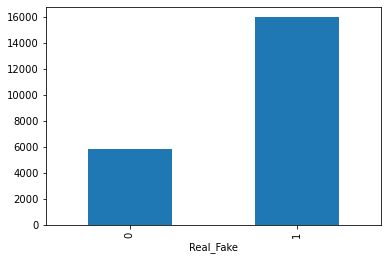

In [50]:
# How many fake and real articles?
print(Data.groupby(['Real_Fake'])['tweet_text'].count())
Data.groupby(['Real_Fake'])['tweet_text'].count().plot(kind="bar")
plt.show()

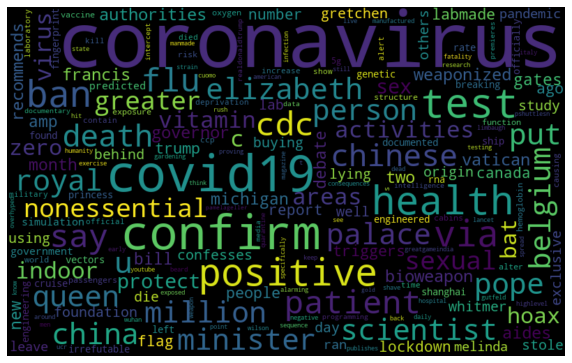

In [52]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = Data[Data["Real_Fake"] == 0]
all_words = ' '.join([text for text in fake_data.tweet_text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

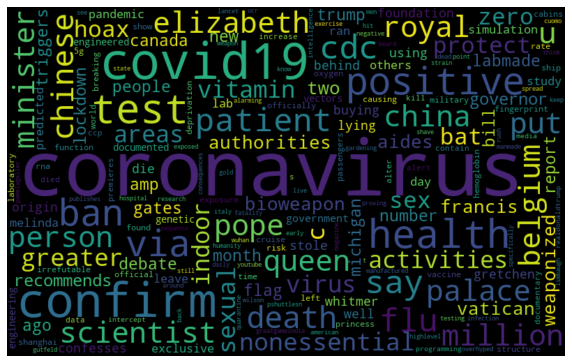

In [53]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = Data[Data["Real_Fake"] == 1]
all_words = ' '.join([text for text in fake_data.tweet_text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

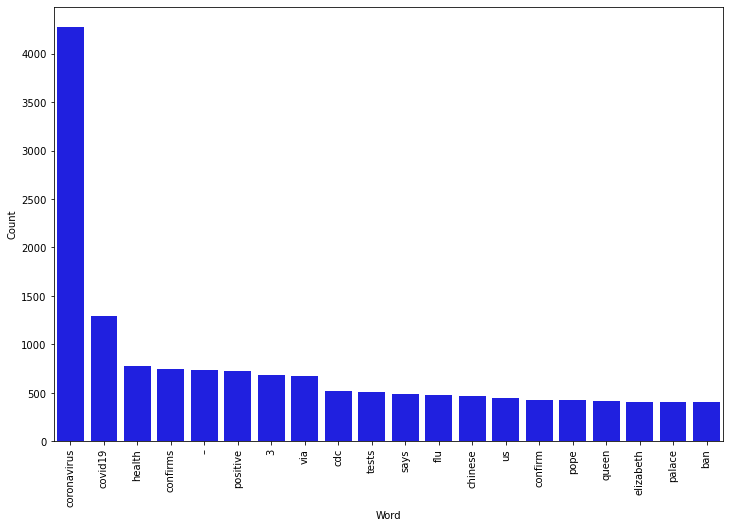

In [55]:
# Most frequent words in fake news
counter(Data[Data["Real_Fake"] == 0], "tweet_text", 20)

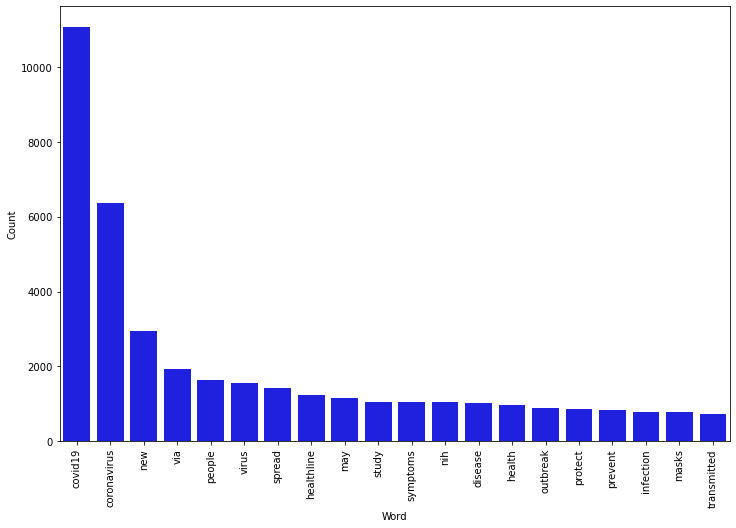

In [56]:
# Most frequent words in real news
counter(Data[Data["Real_Fake"] == 1], "tweet_text", 20)

# Modelling

In [57]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Preparing the Data

In [58]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(Data['tweet_text'], Data.Real_Fake, test_size=0.2, random_state=42)

# Logistic Regression

In [59]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.97%


Confusion matrix, without normalization


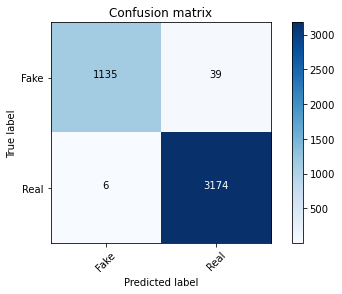

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 97.61%


Confusion matrix, without normalization


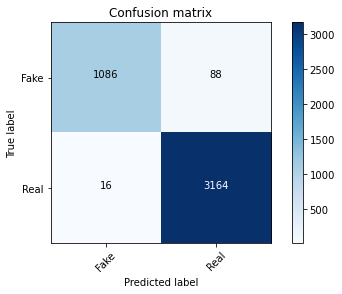

In [62]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.4%


Confusion matrix, without normalization


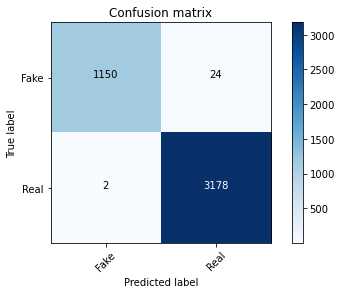

In [64]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])